<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/pc_cl_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/PyCaret.png?raw=true)

https://pycaret.org

# **Clasificación**

# **Advertencias**

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Instalando PyCaret**

In [2]:
! pip install --use-deprecated=legacy-resolver pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://stackoverflow.com/questions/68477475/problem-on-installing-pycaret-full-on-google-colab

In [3]:
!pip install Jinja2 --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Habilitando Google Colab**

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from pycaret.utils import version
version()

'2.3.10'

## **Carga de librerías necesarias**

In [6]:
import pandas as pd
import jinja2

## **Ingeniería de las características de los Datos**

### **Extracción de Datos - Creación del DataFrame**

In [7]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"

In [8]:
archivo = "Clientes.csv"

In [9]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


**El dataframe contiene 5 variables y 400 observaciones.**

**Las variables indican:**
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

**El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.**

### **Selección de características**

In [10]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...**

In [11]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

**Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...**

In [12]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


# **Configuración del entorno en PyCaret**

**La función setup() inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función setup() debe ser llamada antes de ejecutar cualquier función de PyCaret.** 

**Se necesitan dos parámetros obligatorios:** 
- Un marco de datos de Pandas y, 
- el nombre de la columna de destino. 

**Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.**

In [13]:
from pycaret.classification import *

**Cuando se ejecuta setup(), el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades.**

**El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta setup( ).** 

**Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático.** 

**Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.**

In [14]:
clasificacion = setup(data = clientes, target = "Compra", session_id=0, train_size=0.75)

,Description,Value
0,session_id,0
1,Target,Compra
2,Target Type,Binary
3,Label Encoded,"No: 0, Si: 1"
4,Original Data,"(400, 4)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# **Comparando los algoritmos de Clasificación**

**Comparar todos los modelos para evaluar el rendimiento es el punto de partida recomendado para el modelado una vez que se completa la configuración (a menos que sepa exactamente qué tipo de modelo necesita, que a menudo no es el caso).**

In [15]:
mejor_modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9000,0.9479,0.8826,0.8598,0.8673,0.7874,0.7919,0.014
rf,Random Forest Classifier,0.8933,0.9290,0.8818,0.8441,0.8590,0.7735,0.7781,0.463
gbc,Gradient Boosting Classifier,0.8867,0.9272,0.8545,0.8499,0.8462,0.7569,0.7634,0.079
catboost,CatBoost Classifier,0.8867,0.9398,0.8727,0.8370,0.8509,0.7600,0.7646,0.606
lightgbm,Light Gradient Boosting Machine,0.8833,0.9355,0.8545,0.8356,0.8413,0.7493,0.7535,0.085
nb,Naive Bayes,0.8800,0.9426,0.8098,0.8608,0.8292,0.7376,0.7435,0.014
et,Extra Trees Classifier,0.8800,0.9312,0.8553,0.8319,0.8390,0.7438,0.7485,0.456
xgboost,Extreme Gradient Boosting,0.8800,0.9266,0.8379,0.8503,0.8346,0.7413,0.7501,0.325
ada,Ada Boost Classifier,0.8633,0.9079,0.7826,0.8459,0.8066,0.7018,0.7091,0.095
dt,Decision Tree Classifier,0.8533,0.8423,0.8008,0.8055,0.7964,0.6825,0.6897,0.013


**De forma predeterminada, compare_models( ) devuelve el modelo con mejor rendimiento según el orden de clasificación predeterminado, pero se puede usar para devolver una lista de los $N$ modelos principales mediante el parámetro include = lista.**

In [16]:
print(mejor_modelo)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


# **Creación del Modelo**

In [17]:
print("Los clasificadores son:", len(models()))

Los clasificadores son: 19


In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## **Algoritmo Árbol de Decisión**

In [19]:
dt = create_model('dt', criterion = "entropy", random_state = 100, max_depth=2)
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8325,0.9091,0.6667,0.7692,0.6000,0.6225
1,0.9333,0.9211,0.9091,0.9091,0.9091,0.8565,0.8565
2,0.7667,0.7656,0.7273,0.6667,0.6957,0.5070,0.5083
3,0.9333,0.9378,0.9091,0.9091,0.9091,0.8565,0.8565
4,0.8667,0.8876,1.0000,0.7333,0.8462,0.7333,0.7609
5,0.9000,0.9498,1.0000,0.7857,0.8800,0.7964,0.8134
6,0.9000,0.9067,0.9091,0.8333,0.8696,0.7887,0.7907
7,0.9333,0.9139,1.0000,0.8462,0.9167,0.8618,0.8701
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


# **Visualización del Modelo**

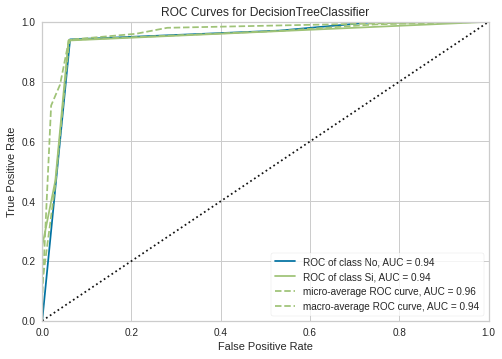

In [20]:
plot_model(dt, plot = 'auc')

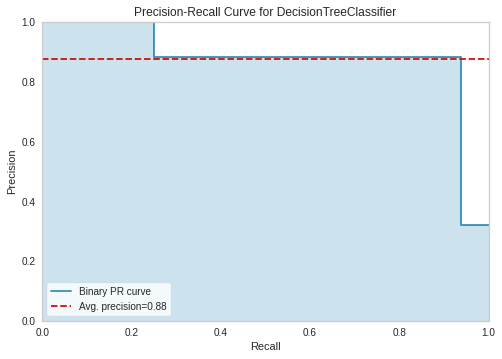

In [21]:
plot_model(dt, plot = 'pr')

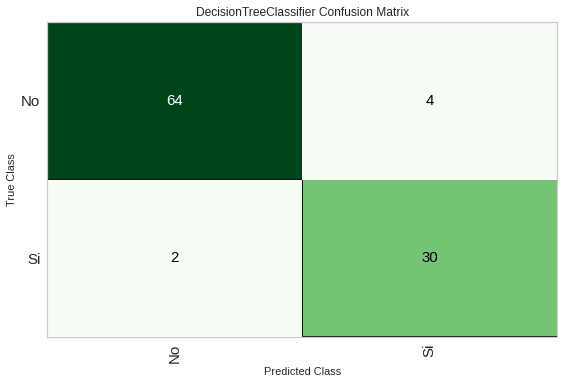

In [22]:
plot_model(dt, plot = 'confusion_matrix')

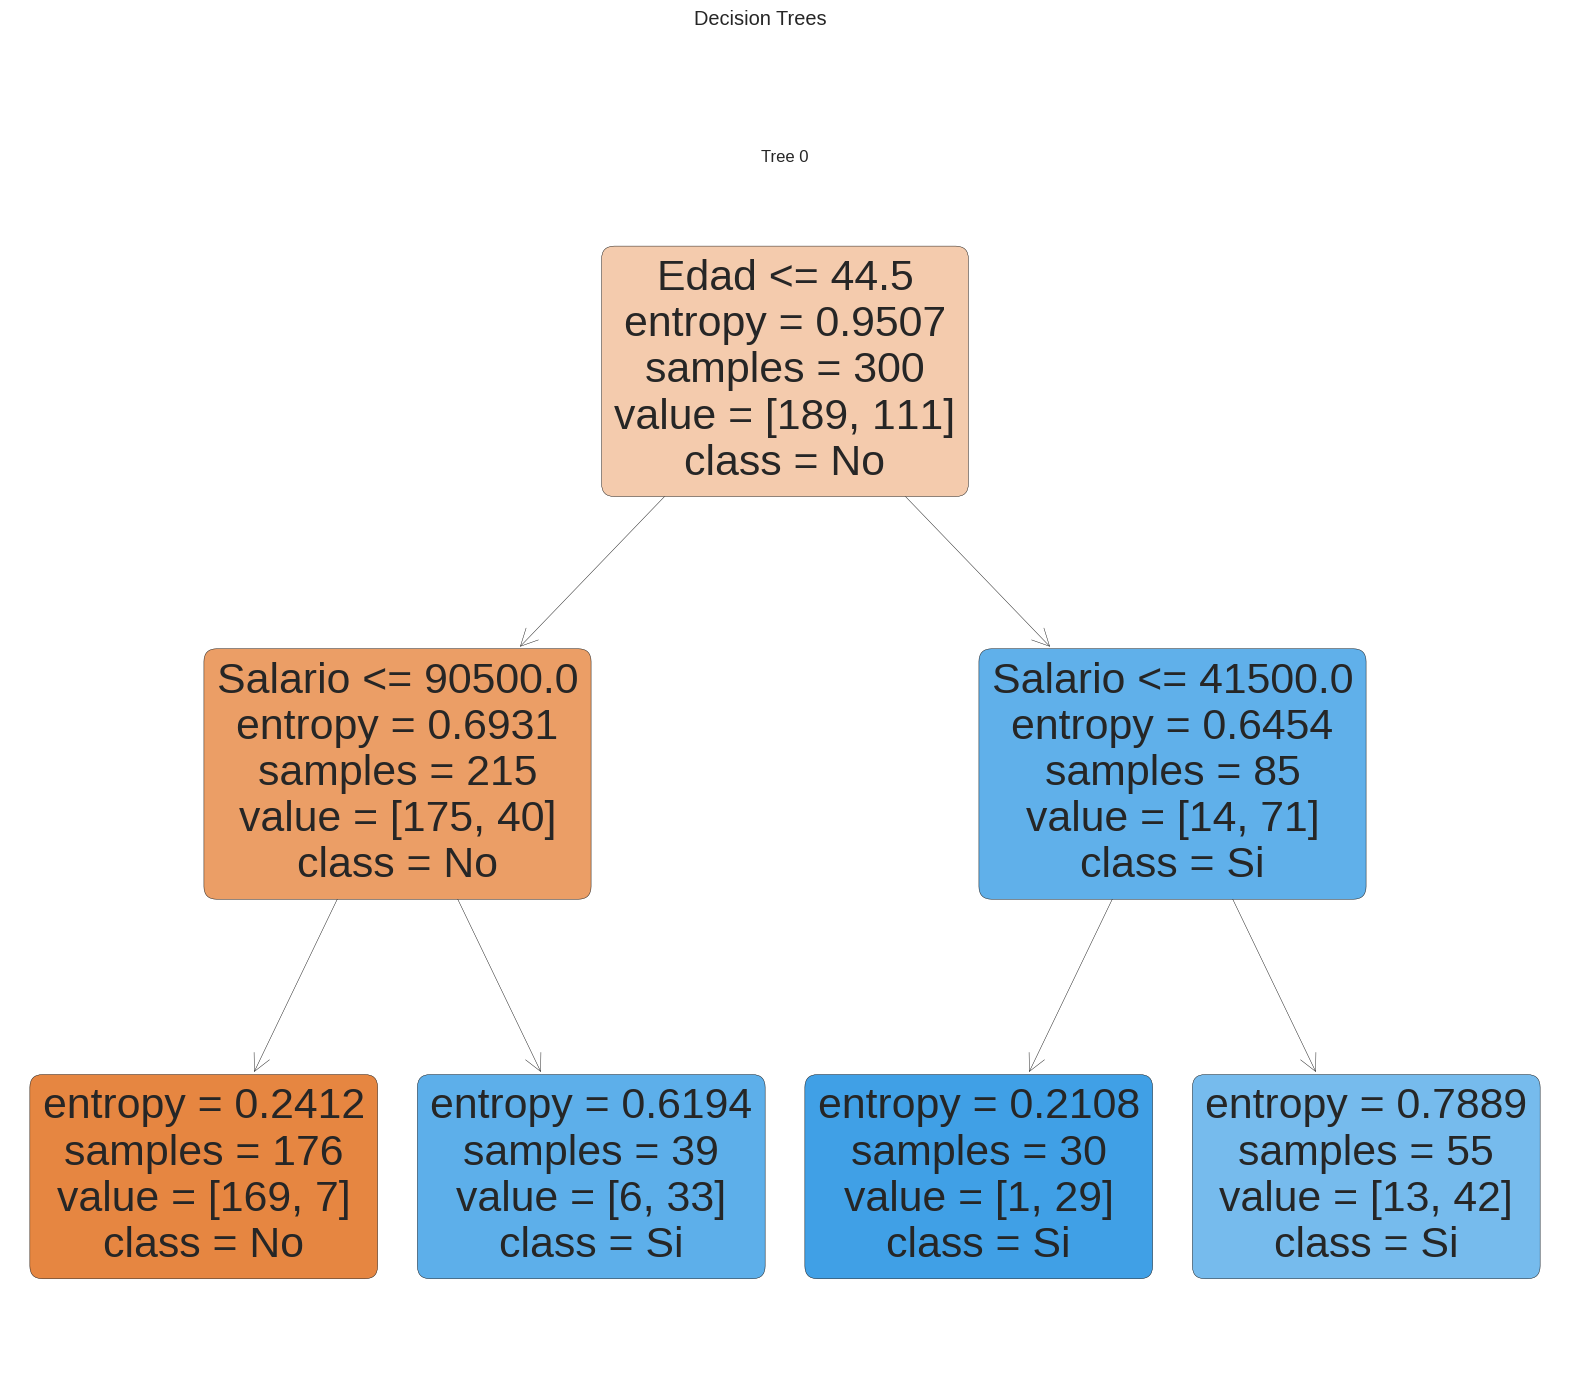

In [23]:
plot_model(dt, plot = 'tree')

# **Evaluacion del Modelo**

In [24]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predicción sobre datos de prueba**

In [25]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.94,0.943,0.9375,0.8824,0.9091,0.8644,0.8653


,Edad,Salario,Trabajo_1,Compra,Label,Score
0,30.0,87000.0,1.0,No,No,0.9602
1,38.0,50000.0,0.0,No,No,0.9602
2,35.0,75000.0,1.0,No,No,0.9602
3,30.0,79000.0,0.0,No,No,0.9602
4,35.0,50000.0,0.0,No,No,0.9602
...,...,...,...,...,...,...
95,27.0,96000.0,0.0,Si,Si,0.8462
96,23.0,63000.0,1.0,No,No,0.9602
97,48.0,33000.0,1.0,Si,Si,0.9667
98,48.0,90000.0,1.0,Si,Si,0.7636


# **Finalizando el modelo para implementación**

In [26]:
final_dt = finalize_model(dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [27]:
predict_model(final_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.94,0.9407,0.9375,0.8824,0.9091,0.8644,0.8653
